#THE MNIST DATASET CONTAINS IMAGES OF HANDWRITTEN DIGITS 

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('MNIST.csv')

In [2]:
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##VISUALIZING THE DATA

In [3]:
df.shape

(42000, 785)

In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
data=df.values


In [6]:
type(data)

numpy.ndarray

In [7]:
data.shape

(42000, 785)

In [8]:
x=data[:,1:]
y=data[:,0]

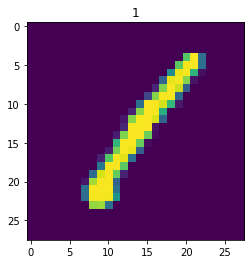

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x[0].reshape(28,28))
plt.title(y[0])
plt.show()

#SPLITTING THE DATA INTO TRAIN AND TEST 

In [10]:
split=int(0.8*data.shape[0])
X_train=data[ :split,1:]
Y_train=data[ :split,0]
X_test=data[split:,1:]
Y_test=data[split:,0]

In [11]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

#trying to make 5*5 grid of images






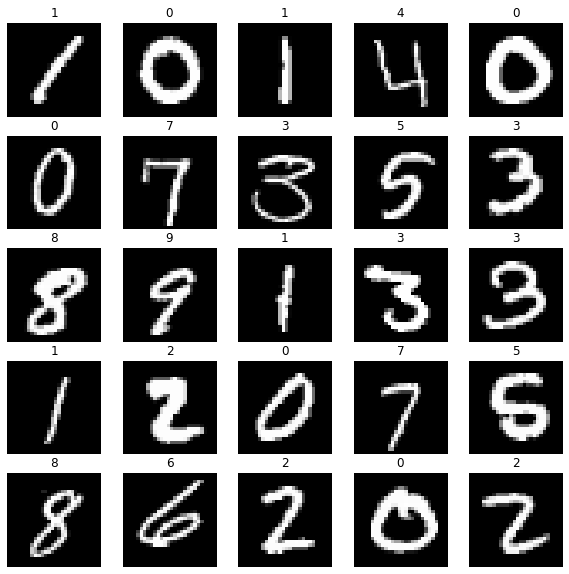

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.title(Y_train[i])
    plt.axis('off')


##done with the visualizing , now applying KNN algorithm

In [13]:
def drawimg(x):
    plt.imshow(x.reshape(28,28),cmap='gray')
    plt.show()
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,query,Y,k=5):
    m=X.shape[0]
    val=[]
    for i in range(m):
        d=dist(query,X[i])
        val.append((d,Y[i]))
    val=sorted(val)
    #taking the first k values 
    val=val[:k]
    val=np.array(val)
    new_val=np.unique(val[:,1],return_counts=True)
    max_freq_ind=new_val[1].argmax()
    pred=new_val[0][max_freq_ind]
    return pred
    


#AS WE ALL KNOW THERE IS NO TRAINING INVOLVED IN KNN ALGORITHM , WE CAN DIRECTLY MAKE PREDICTIONS 

In [14]:
pred=knn(X_train,X_test[1],Y_train)
print(int(pred))

7


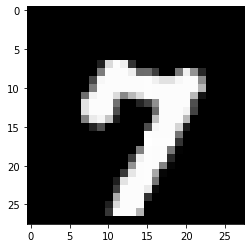

In [15]:
drawimg(X_test[1])

#AS WE CAN SEE OUR MODEL OS WORKING ABSOLUTELY FINE